## На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025

In [61]:
import numpy as np
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression

In [22]:
df = pd.read_json("top500.json")
df = df.T
df = df.reset_index()
df = df.rename(columns={"index": "date"})

In [26]:
df.dtypes

date    datetime64[ns]
Sum             object
#1              object
#500            object
dtype: object

In [46]:
jojo = []
for i in df["#1"].to_list():
    jojo.append(i[0])

df['#1'] = jojo

In [49]:
df.head()

,date,Sum,#1,#500
0,1993-06-01,"[1100.0, GFlop/s]",59.7,"[0.4, GFlop/s]"
1,1993-11-01,"[1500.0, GFlop/s]",124.0,"[0.5, GFlop/s]"
2,1994-06-01,"[2300.0, GFlop/s]",143.4,"[0.8, GFlop/s]"
3,1994-11-01,"[2700.0, GFlop/s]",170.0,"[1.2, GFlop/s]"
4,1995-06-01,"[3900.0, GFlop/s]",170.0,"[2.0, GFlop/s]"


Text(0, 0.5, 'GFlop/s')

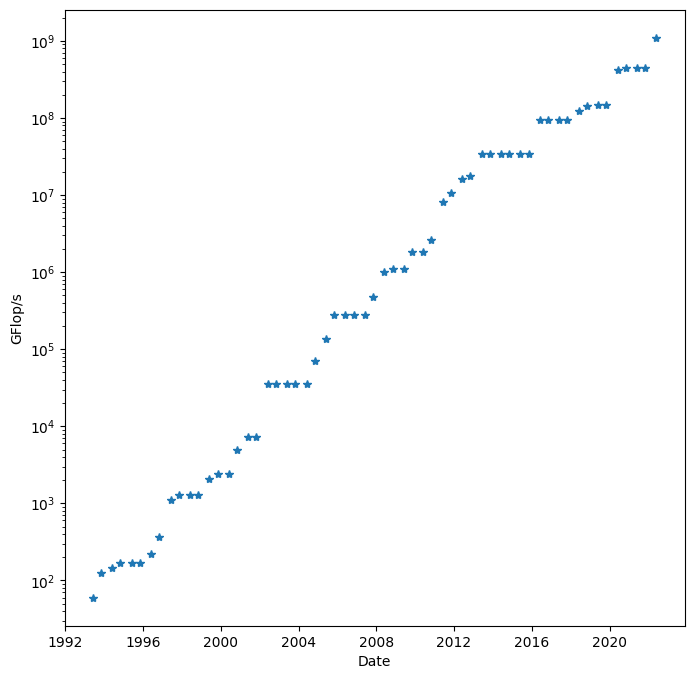

In [60]:
plt.figure(figsize=(8, 8))
ax = plt.subplot()
colors = ['blue', 'orange', 'red']
ax.set_yscale('log')

ax.plot(df["date"], df['#1'], '*')
ax.set_xlabel('Date')
ax.set_ylabel('GFlop/s')

In [71]:
model = LinearRegression()
predictions = {'date': df['date']}

x = (df['date'] - df['date'][0]).dt.days.values.reshape(-1, 1)
t = df["#1"].values.reshape(-1, 1)
model.fit(x, np.log(t))
y = np.exp(model.predict(x))

predictions["#1"] = y.flatten()





Text(0, 0.5, 'GFlop/s')

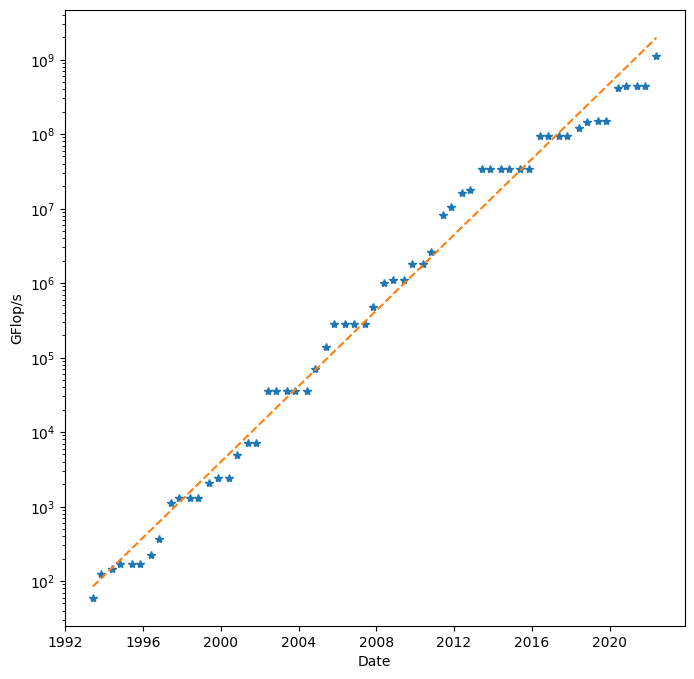

In [65]:
plt.figure(figsize=(8, 8))
ax = plt.subplot()
colors = ['blue', 'orange', 'red']
ax.set_yscale('log')

ax.plot(df["date"], df['#1'], '*')

ax.plot(df["date"], predictions["#1"], '--')

ax.set_xlabel('Date')
ax.set_ylabel('GFlop/s')

In [77]:
x = (pd.Timestamp('2025-01-01') - df['date'][0]).days

k, b = model.coef_, model.intercept_

print(f'{np.exp(k * x + b)[0][0]:.2} GFlop/s')

8.9e+09 GFlop/s


**Ответ:** 
На начало 2025 года, если если не случится форс мажорные обстоятельства, производительность мощнейшего компьютера будет составлять 8.8 EFlop/s

## Оцените какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)

В чате курса был предложен источник, где указано колличество протребляемого на земле электричества: https://ourworldindata.org/grapher/electricity-prod-source-stacked.
Согласно этому источнику в 2021 году потребление электричества составляет 28214 TWh. Теперь посчитаем потребление электричества машинами с сайта top500.

О потребляемой мощности 320 компьютеров из 500 нет информации, примем их значение - медианным по имеющимся.

In [89]:
total = 2.8214e16

df_green = pd.read_excel("green500_top_202206.xlsx")
df_power = df_green['Power (kW)']
df_power = df_power.fillna(df_power.median())
sum_power = df_power.sum()

При условии что эти компьютеры работают нонстоп на полную мощьность с заявленым потреблением то за год будет  использовано следующее количество киловатт 

In [91]:
total_super_comp = 365*24*sum_power
print(f"Всего за год суперкомпьютеры на взятый момент времени примерно потребили: {total_super_comp} kW")

Всего за год суперкомпьютеры на взятый момент времени примерно потребили: 5242872702.0 kW


In [94]:
print(f"Процент потребляемого суперкомпьютерами электричества: {round(float(total_super_comp * 1e5 / total), 4)} %")

Процент потребляемого суперкомпьютерами электричества: 0.0186 %


**Ответ:** Процент который потребляют суперкомпьютеры относительно всего произведённого электричества составляет 0.0186 %